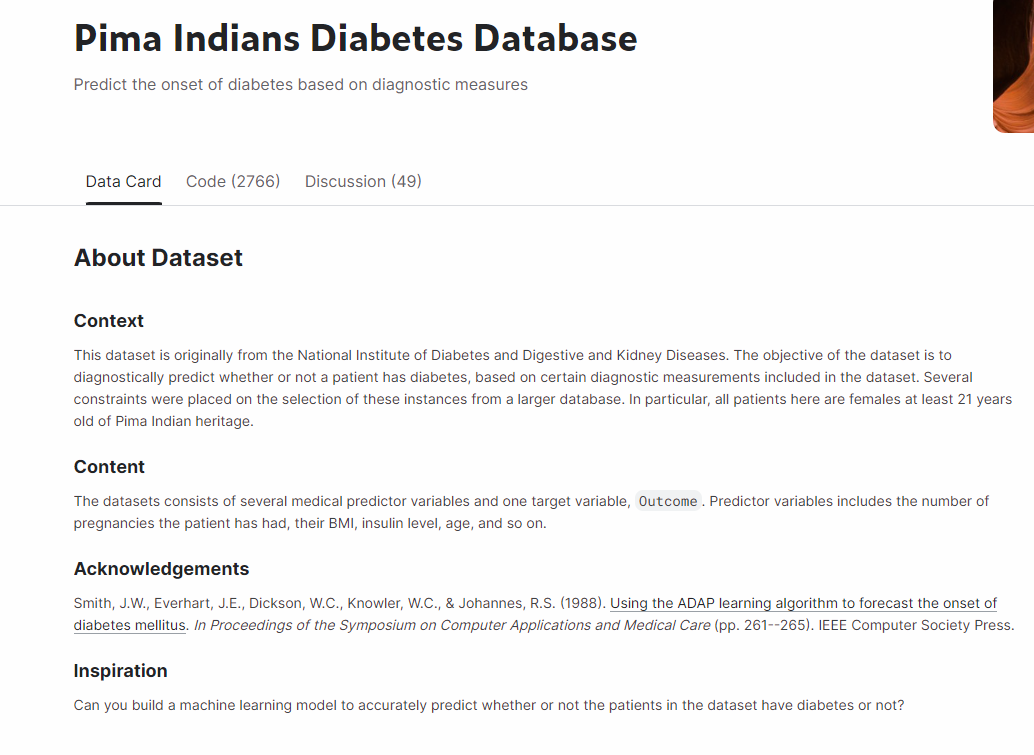

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [3]:
os.getcwd()

'C:\\Users\\Lenovo\\Desktop\\27th Nov - Stats and ML Batch\\LogisticRegression'

In [18]:
dataset = pd.read_csv("diabetes.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [20]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [21]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [22]:
dataset['Glucose'].value_counts()/len(dataset)*100

99     2.213542
100    2.213542
111    1.822917
129    1.822917
125    1.822917
         ...   
191    0.130208
177    0.130208
44     0.130208
62     0.130208
190    0.130208
Name: Glucose, Length: 136, dtype: float64

In [23]:
dataset['Glucose'] = np.where(dataset['Glucose']==0,117,dataset['Glucose'])

In [24]:
dataset['BloodPressure'] = np.where(dataset['BloodPressure']==0,72,dataset['BloodPressure'])
dataset['SkinThickness'] = np.where(dataset['SkinThickness']==0,23,dataset['SkinThickness'])
dataset['Insulin'] = np.where(dataset['Insulin']==0,30,dataset['Insulin'])
dataset['BMI'] = np.where(dataset['BMI']==0,32,dataset['BMI'])

In [25]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.408854,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.695978,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
dataset.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30,33.6,0.627,50,1
1,1,85,66,29,30,26.6,0.351,31,0


In [13]:
# sigmoid = (1 / 1 + e^-y)
def sigmoid(z):
    return (1/(1+np.exp(-z)))

In [14]:
sigmoid(5)

0.9933071490757153

In [15]:
sigmoid(1000)

1.0

In [16]:
sigmoid(-5)

0.0066928509242848554

In [17]:
sigmoid(-5000)

0.0

In [27]:
# Check data is balance or not ?
dataset['Outcome'].value_counts()/len(dataset)*100

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [28]:
# Split the data into ind variable and dep variable
x = dataset.iloc[:,0:-1]
y = dataset.iloc[:,-1]

In [29]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30,33.6,0.627,50
1,1,85,66,29,30,26.6,0.351,31
2,8,183,64,23,30,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [30]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [31]:
# Split the data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101,
                                                   stratify=y) 
# stratify means it will ensure to split the data for both (0 and 1) into train and test dataset

# Building Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(multi_class='ovr')
logit_model.fit(x_train, y_train)

LogisticRegression(multi_class='ovr')

In [34]:
# Predict the model with train and test 

y_pred_train = logit_model.predict(x_train)
y_pred_test = logit_model.predict(x_test)

# Evaluation metrics

In [35]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [37]:
print(confusion_matrix(y_train, y_pred_train))
print("**************"*10)
print(confusion_matrix(y_test, y_pred_test))

[[357  43]
 [ 88 126]]
********************************************************************************************************************************************
[[89 11]
 [24 30]]


In [38]:
print(classification_report(y_train, y_pred_train))
print("**************"*10)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       400
           1       0.75      0.59      0.66       214

    accuracy                           0.79       614
   macro avg       0.77      0.74      0.75       614
weighted avg       0.78      0.79      0.78       614

********************************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       100
           1       0.73      0.56      0.63        54

    accuracy                           0.77       154
   macro avg       0.76      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154



In [39]:
print("Training Accuracy Score", accuracy_score(y_train, y_pred_train))
print("**************"*10)
print("Test Accuracy Score", accuracy_score(y_test, y_pred_test))

Training Accuracy Score 0.7866449511400652
********************************************************************************************************************************************
Test Accuracy Score 0.7727272727272727


In [ ]:
# AUC-ROC Curve
# K-Fold method
# EDA - dtale, pandas profilling, datapred, lux 